## Building Random Quantum Circuits, with and without Noise, to Analyse Measurement Outcome Fidelity

**Authors:** Pranavi Jain, Dr Marcin Abram

**Affiliation:** University of Southern California

**Configure Qiskit Runtime Service**

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="%your-API-token%", 
                                  set_as_default=True, overwrite=True)
 
# Load saved credentials
service = QiskitRuntimeService()

**Generate a Random Circuit for Given Parameters**
<br>
- Args:
    * noq - number of qubits
    * depth - depth of qauntum circuit
    * gate_set - dict of specified set of gates

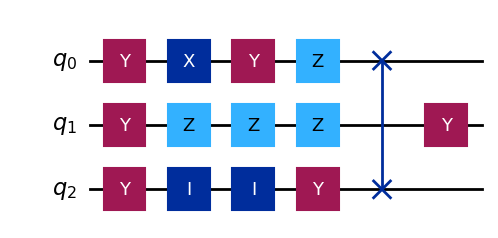

In [1]:
from random_circuit import eagle_gate_set, basis_gate_set
from random_circuit import get_random_circuit

## Main Function -- 1) Calling Random Circuit Generator
noq = 3
depth = 5
gate_set = basis_gate_set

circuit = get_random_circuit(noq, depth, gate_set)
circuit.draw('mpl')

**Add arbitrary Noise to Circuit generated above**

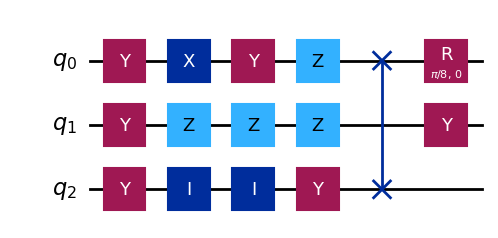

In [2]:
import numpy as np

## Main Function cntd -- 2) Adding Noise to a copy of the Circuit
noiseCirc = circuit.copy()
noiseCirc.r(np.pi/8, 0, 0)      # Noise to changed here !

noiseCirc.draw("mpl")

**Measure the two Circuits (with and without noise) in 3 Different Basis - X, Y, Z**
<br>
The output for 'n' number of runs is stored as a list for each of the circuits

In [3]:
from qiskit.providers.basic_provider import BasicSimulator
from measure_circuit import get_circuit_output

## Main Function cntd -- 3) Performing Measurements on the Circuits
runs = 3
backend = BasicSimulator()
# backend = service.backend("ibmq_qasm_simulator")

circOutput = get_circuit_output(circuit, runs, backend)
print("Measurement outcomes for circuit WITHOUT noise:")
for i in range(0, runs):
    print(circOutput[i])
print('\n')
noiseCircOutput = get_circuit_output(noiseCirc, runs, backend)
print("Measurement outcomes for circuit WITH noise:")
for i in range(0, runs):
    print(noiseCircOutput[i])

Measurement outcomes for circuit WITHOUT noise:
{'X': {'001': 122, '100': 122, '111': 159, '000': 113, '101': 138, '010': 140, '110': 112, '011': 118}, 'Y': {'110': 130, '011': 133, '001': 114, '000': 131, '100': 132, '101': 127, '010': 128, '111': 129}, 'Z': {'100': 1024}}
{'X': {'011': 120, '100': 118, '001': 110, '000': 138, '110': 138, '111': 122, '010': 139, '101': 139}, 'Y': {'001': 146, '011': 117, '100': 141, '010': 135, '110': 121, '000': 134, '111': 116, '101': 114}, 'Z': {'100': 1024}}
{'X': {'010': 142, '110': 127, '101': 135, '001': 111, '000': 120, '100': 131, '111': 127, '011': 131}, 'Y': {'100': 124, '111': 128, '110': 126, '010': 134, '101': 132, '000': 136, '001': 130, '011': 114}, 'Z': {'100': 1024}}


Measurement outcomes for circuit WITH noise:
{'X': {'110': 118, '010': 117, '100': 167, '000': 147, '111': 120, '001': 126, '101': 118, '011': 111}, 'Y': {'001': 123, '110': 127, '101': 130, '100': 131, '000': 138, '011': 120, '010': 110, '111': 145}, 'Z': {'100': 989,

**Compute Fidelity for the two Measurement Outcomes for 'n' Runs**

In [4]:
from utils import get_matched_fidelity

## Main Function cntd -- 4) Computing Fidelity on:
#   - circOutput 
#   - noiseCircOutput 

for i in range(0, runs):
    print('\nOutput RUN ' + str(i) + ":")
    for b in ("X","Y","Z"):
        fidelity = get_matched_fidelity(circOutput[i], noiseCircOutput[i], b)
        print("In basis " + b + ", fidelity = " + str(fidelity))



Output RUN 0:
Circuit - {'001': 122, '100': 122, '111': 159, '000': 113, '101': 138, '010': 140, '110': 112, '011': 118}
Noisy C - {'110': 118, '010': 117, '100': 167, '000': 147, '111': 120, '001': 126, '101': 118, '011': 111}
In basis X, fidelity = 0.9897450615152791
Circuit - {'110': 130, '011': 133, '001': 114, '000': 131, '100': 132, '101': 127, '010': 128, '111': 129}
Noisy C - {'001': 123, '110': 127, '101': 130, '100': 131, '000': 138, '011': 120, '010': 110, '111': 145}
In basis Y, fidelity = 0.9982601554033358
Circuit - {'100': 1024}
Noisy C - {'100': 989, '101': 35}
In basis Z, fidelity = 0.9658203124999999

Output RUN 1:
Circuit - {'011': 120, '100': 118, '001': 110, '000': 138, '110': 138, '111': 122, '010': 139, '101': 139}
Noisy C - {'100': 125, '000': 127, '001': 137, '101': 121, '111': 126, '010': 146, '011': 119, '110': 123}
In basis X, fidelity = 0.997087149607559
Circuit - {'001': 146, '011': 117, '100': 141, '010': 135, '110': 121, '000': 134, '111': 116, '101': 1